# Changelog
1. Removed commented out code (done)
2. Added problem description
3. Added limitations to the analysis
4. Added extra elaboration chapter 2.1 (done)
5. Added fraud detection: transfers with amount of 0 (chapter 3.2) (done)
6. Added conclusion: transfers with amount of 0
7. Added conclusion: transfers result in negative origin balances
8. Added conclusion: Inconsistencies in balances (see 2.1)
9. Added conclusion: C1286084959 is fraudulent 
10. Added conclusion: Origin accounts that transfer precisely 4 times are fraudulent
11. Added fraud detection: most used origin accounts (chapter 3.4) (done)
12. Added fraud detection: Inconsistencies in account balances over timestamps (see 3.5)

# SEN163A - Fundamentals of Data Analytics
# Assignment 1 - Data consistency
### Ir. Jacopo De Stefani - [J.deStefani@tudelft.nl](mailto:J.deStefani@tudelft.nl)
### Joao Pizani Flor, M.Sc. - [J.p.pizaniflor@tudelft.nl](mailto:J.p.pizaniflor@tudelft.nl)

## Group 2
- Emmanuel M Boateng - '5617642'
- Joost Oortwijn - '4593472'
- Philip Busscher - '4611993'
- Floris Kool - '4975243'

## Evaluation criteria
The final grade for this assignment will be calculated based on the following criteria:

- $\textbf{Quality of the report}$ - 35\%
    - Reasonable formatting of the document and used citation appropriately
    - Use of proper English (typos, grammar)
    - Code script deliverable
    - Code quality
    - Problem Description
    - Dataset Description
    - Limitations
    - Conclusion/Action recommendations

- $\textbf{Identification of the problems in the database}$ - 65\%


# Introduction - Problem Description

problem description

# 1. Dataset Description

First we will describe the data set. By doing so, we try to identify the inconsistencies in the data set and possible fraudulent activities. We will do so by doing some basic data description prints and plots of the data. 

In [1]:
### Read and load the database

import pandas as pd
import matplotlib as plt
import sqlite3 as sq3
import numpy as np

dbfile = 'transaction_data.db' # path to the file 

conn = sq3.connect(dbfile)  # Create a SQL connection to our SQLite database
curs = conn.cursor()

##Check the tables in the database
table_lst = [a for a in curs.execute("SELECT name FROM sqlite_master WHERE type = 'table'").fetchall()]
print(table_lst) # here is you table list

##get the table info 
for row in curs.execute('PRAGMA table_info(transaction_data)'):    
    print(row)

##read the SQL data and print the first five lines
df = pd.read_sql_query("SELECT * FROM transaction_data", conn) 
##df.head()

##create a list of all columns 
col_names = []
for row in curs.execute('PRAGMA table_info(transaction_data)'):
    names = row[1]
    col_names.append(names)

[('transaction_data',)]
(0, 'id', 'integer', 0, None, 1)
(1, 'timestamp', 'integer', 1, None, 0)
(2, 'type', 'text', 1, None, 0)
(3, 'amount', 'text', 1, None, 0)
(4, 'nameOrig', 'text', 1, None, 0)
(5, 'oldbalanceOrig', 'text', 1, None, 0)
(6, 'newbalanceOrig', 'text', 1, None, 0)
(7, 'nameDest', 'text', 1, None, 0)
(8, 'oldbalanceDest', 'text', 1, None, 0)
(9, 'newbalanceDest', 'text', 1, None, 0)



DataFrame Shape : (7734834, 10)

Number of data points : 7734834

Number of data variables : 10
         amount  timestamp  newbalanceOrig  newbalanceDest
min         0.0          1     -92445520.0      -4234680.0
max  92445520.0        743      77428944.0     357440832.0

Mean amount transferred : 146411.953125

No.of. origin accounts : 6353308

No.of. destination accounts : 2722364


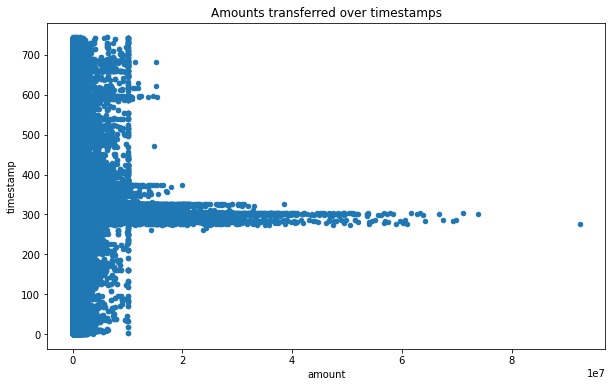

In [2]:
## Get the data description

## convert the str columns of convert_list to numeric
df = df.astype({"amount":"float32", "oldbalanceOrig":"float32", 
               "newbalanceOrig":"float32", 
               "oldbalanceDest":"float32", 
               "newbalanceDest":"float32"})


data_shape = df.shape
print('\nDataFrame Shape :', data_shape)
print('\nNumber of data points :', data_shape[0])
print('\nNumber of data variables :', data_shape[1])


df_MinMax = df[['amount','timestamp', 'newbalanceOrig', 'newbalanceDest']].agg(['min','max'])
print (df_MinMax)

chnk_sz = 7
data_chunks = np.array_split(df, chnk_sz)

df_meanAmount = df['amount'].mean()
print('\nMean amount transferred :', df_meanAmount)

##some info about the dataset (already done with sqlite 
##df.info(verbose=True, buf=None, max_cols=True, memory_usage=None, show_counts=True)

## Plotting some data. Not so informative. TBD: Perhaps filter and plot based on amounts
df.plot(x='amount', y='timestamp', kind='scatter',
        figsize=(10,6),
        title='Amounts transferred over timestamps')

origAcc = pd.unique(df['nameOrig']).tolist()
destAcc = pd.unique(df['nameDest']).tolist()

orig_n = len(origAcc)
dest_n = len(destAcc)


print("\nNo.of. origin accounts :", orig_n)
print("\nNo.of. destination accounts :", dest_n)

##df.plot(y=['amount'])

##TBD count timestamp with most # of transactions


### Discussion results data description

Noteable results: 

1. Especially when looking at the graph above, *Amounts transferred over timestamps*, it stands out that around time stamp 300 significantlly higher amounts of money is transferred. Therefore it is interesting to study this inconsitency more indepth in the fraud identification chapter 3 below. 
2. When looking at the maximal and mininimal amount transferred, it is interesting to see that there are amounts transferred with a value of 0.00. Also the max value of 92 milion transferred stands out due to it's size. These two values will be researched more in chapter 3. 
3. When looking at the minimum values of *newbalanceOrig* and *newbalanceDest*, it stands out that there accounts with large negative balances. This could suggest there is fraudulent activity and will be discussed in chapter 3. 

## 1.1 Value counts of origin and destination accounts

In [ ]:
df['nameOrig'].value_counts()[:10]

In [ ]:
ax = df['nameOrig'].value_counts()[:10].sort_values().plot(kind = 'barh',figsize=(10,6),title='Most used orgin accounts')
ax.set_xlabel("Number of times as origin account")
ax.set_ylabel("Account name")

In [ ]:
df['nameDest'].value_counts()[:10]

In [ ]:
ax = df['nameDest'].value_counts()[:10].sort_values().plot(kind = 'barh',figsize=(10,6),title='Most used destination accounts')
ax.set_xlabel("Number of times as destination account")
ax.set_ylabel("Account name")

### Discussion value counts origin and destination accounts


When looking at the graph above, *most used destination accounts*, it can be seen that almost 1.4 milion transfers (of a total of 7 milion tranfers) is to the same destination account. This could indicate potential fraud and will be looked at more in depth in chapter 3.
Also there are some interesting things to see when looking at the origin accounts. For example, many transactions are done from C1286084959 which is an outlier compared to how often the other transactions occur. Also, a lot of origin accounts occur precisely 4 times in the data set as an origin account. This will be researched in chapter 3.4

# 1.2 Limitations data set

In [ ]:
# Check if there ar NaN values in the dataset
df.isnull().sum(axis = 0)

# 2. Dataset Consistency

## 2.1 Inconsistencies in balances
When looking at the the first rows of the dataframe we found inconsistencies in the balances. Balances were not as expected when looking at the amounts transferred, the new origin balance values and the old balance values of the destination accounts. Therefore these inconsisentcies will be checked for the rest of the data.

In [ ]:
# As the dataset contains a lot of data, we will start by only looking at a part of the complete dataset
grouped = df.groupby(df.timestamp)
g = grouped.get_group(19)

In [ ]:
# Create new coluns with the expected new balances based on the ammounts transferred
pd.set_option('mode.chained_assignment', None)
g['New_balance_checkOrig'] = g['oldbalanceOrig']-g['amount']
g['New_balance_checkDest'] = g['oldbalanceDest']+g['amount']
g = g.reset_index()

In [ ]:
#g_test = g['newbalanceOrig','newbalanceDest','New_balance_checkOrig','New_balance_checkDest']
pd.set_option('mode.chained_assignment', None)

for i in range(len(g)):
    if g.loc[i,'newbalanceOrig'] != g.loc[i,'New_balance_checkOrig']:
        newOrig = g.loc[i,'newbalanceOrig']
        checkOrig =  g.loc[i,'New_balance_checkOrig']
        differenceOrig = abs(checkOrig-newOrig)
        if differenceOrig > 0.001:
            g['difference orig'] = differenceOrig
            #print('Difference found in origin balance -> row : ', i, ' ,difference : ', differenceOrig)
    
    if g.loc[i,'newbalanceDest'] != g.loc[i,'New_balance_checkDest']:
        newDest =g.loc[i,'newbalanceDest']
        checkDest=g.loc[i,'New_balance_checkDest']
        differenceDest =  abs(newDest-checkDest)
        if differenceDest > 0.001:
            g['difference dest'] = differenceDest
          #  print('Difference found in destination balance -> row : ', i, ' ,difference : ', differenceDest)

In [ ]:
# check if there differences above 0.01
(g['difference orig'] > 0.01).any()

In [ ]:
# Number of differences in expected origin balances and actual origin balances
(g['difference orig'] > 0).value_counts()

In [ ]:
# check if there differences above 0.01
(g['difference dest'] > 0.01).any()

In [ ]:
# Number of differences in expected destination balances and destinationbalances
(g['difference dest'] > 0).value_counts()

#### Check for the whole data set

In [ ]:
dest_check = (df['newbalanceDest'] - df['oldbalanceDest']) - df['amount']
orig_check = (df['oldbalanceOrig'] - df['newbalanceOrig']) - df['amount']

In [ ]:
decimal_bins = [-1,0.0,0.0005,0.001, 0.005, 0.01,1]

In [ ]:
dest_check.groupby(pd.cut(dest_check,decimal_bins)).count()

In [ ]:
orig_check.groupby(pd.cut(orig_check,decimal_bins)).count()

### Discussion value counts origin and destination accounts

It stands out that there are a lot of differences in expected balances and actual balance. But, the differences are always below 0.01. Also when analyzing the whole dataset we find a lot of differences in expected balances and actual balance. For approximately 1.7 million transfers there is difference in expected origin balance and actual orgin balance and for approximately 3.1 million transfers there is difference in expected destination balance and actual destination balance.


Due to the number of found inconsistencies and the low amount of differences we do not expect this to be fraudulent but a small error (possibly a round-off) in the data set. 

## 2.2 Check for inconsistencies in balances from a whole system point of view

In chapter 2.1 we have identified inconsistencies in balances within transfers. In addition, we will check the balances from a whole system point of view. Assuming that the database contains all the transfers of a closed system, one can expect that the net balance of the whole system is 0 as money is transfer from account A to account B within the system. 

In [ ]:
# Get sum of each relevant column
sum_oldbalanceOrig = df['oldbalanceOrig'].sum()     
sum_newbalanceOrig = df['newbalanceOrig'].sum()     
sum_oldbalanceDest = df['oldbalanceDest'].sum()     
sum_newbalanceDest = df['newbalanceDest'].sum()     

In [ ]:
# Calculate the amounts that is transfered, so the total amounts sent by the origin accounts and the total amounts received by the 
difference_orig = abs(sum_oldbalanceOrig-sum_newbalanceOrig)
difference_dest = abs(sum_oldbalanceDest-sum_newbalanceDest)

In [ ]:
# Calculate the difference between money sent and money received
transfer_difference = difference_orig-difference_dest
transfer_difference

From the analysis above it can be seen that around 9 million disappears from the system. This number shows that the change in total balance of the origin accounts is approximately 9 million higher than the change in total balance of all the destination accounts. This indicates that more money is transferred by the origin accounts than received by the destination accounts. This indicates observations indicates fraudulent activity which should be noted by GNI bank.

# 3. Fraud Identification

## 3.1 Analyzing transfers to C52983754 (highest value count of 1.4 million times)

In [ ]:
# creating a df with only the transfers to C52983754
df_C52983754 = df[(df['nameDest'] == 'C52983754')]

In [ ]:
print('the max amount transferred to C52983754 is : ' , df_C52983754["amount"].max())
print('the min amount transferred to C52983754 is : ' , df_C52983754["amount"].min())
print('the mean amount transferred to C52983754 is : ' , df_C52983754["amount"].mean())
print('the sum of money (total) transferred to C52983754 is : ' , df_C52983754["amount"].sum())

### Discussion of results

We have found that there were only transfers of 0.01 euro to the C52983754. In total, due to the high volume of transfers, this accounts for an ammount of around 14k. Because of the high volume of transfers and high total sum of transferred money, we percieve this account, C52983754, as fraudulent. 

## 3.2 Maximal and minimal values transferred

### Transfers with an amount of 0

In [ ]:
# New dataframe with transfers of 0 and count number transfers
df_minamount = df[(df['amount'] == 0)]
print('Number of transfers with an amout of 0 : ',len(df_minamount))

In [ ]:
df_minamount

#### Discussion of results
All the above found transactions are suspicious and indicate potential fraud as transactions of no amount is financially not possible. But out of these transactions, the following ID's are extra interesting: 3326130, 7653545, 7734637, 7734640 as an amount of 0 is transferred but the balances of either the origin account or destination account have changed. These are clear clues indicating fraudulent activity. 

## Transfers with an amount higher than 10 million

In [ ]:
# New df with only transfers of 10 milion or higher
df_maxamount = df[(df['amount'] > 10000000)]
print('Number of transfers with an amount of 20 milion or higher : ',len(df_maxamount))

In [ ]:
(df_maxamount['newbalanceOrig'] < 0).value_counts()

In [ ]:
df_maxamount['oldbalanceOrig'].value_counts()

In [ ]:
ax = df_maxamount['timestamp'].value_counts().sort_index().plot(kind = 'barh',figsize=(10,20),title='Number of transfers higher than 20 million per timestamp')
ax.set_xlabel("Number of transfers higher than 10 million")
ax.set_ylabel("Time stamp")

All the transfers of amounts higher than 10 million result in negative balances for the orgin account. This is the case as almost every transfer (2183 out of 2443) is done from an account which has a balance of 0. These negative balances will be researched below in chapter 3.3. Another interesting note here is the fact that the majority of these transfers happen arround the same time stamp (between 262 and 327).  

## 3.3 Negative balances

In [ ]:
df_negativebalance = df[(df['oldbalanceOrig'] <= 0)]
print('Number of negative or 0 origin account balances before transfer: ', len(df_negativebalance))

In [ ]:
df_negativebalance.plot(x='oldbalanceOrig', y='timestamp', kind='scatter',
        figsize=(10,6),
        title='Negative origin or 0 account balances before transfer over timestamps')

In [ ]:
df_negativebalance = df[(df['oldbalanceOrig'] < 0)]
print('Number of negative origin account balances before transfer: ', len(df_negativebalance))

In [ ]:
df_negativebalance1 = df[(df['newbalanceOrig'] <= 0)]
print('Number of negative or 0 origin account balances after transfer: ', len(df_negativebalance1))

In [ ]:
df_negativebalance1 = df[(df['newbalanceOrig'] < 0)]
print('Number of negative origin account balances after transfer: ', len(df_negativebalance1))

In [ ]:
df_negativebalance1.plot(x='newbalanceOrig', y='timestamp', kind='scatter',
        figsize=(10,6),
        title='Negative orgin account balances after transfer over timestamps')

### Discussion of results (negative balances)

- 2559494 transfers are made when the origin account has negative balance or a balance of 0. 7245 of these transfers were done when there was a negative balance of the origin account. This is a sign of potential fraud as it is not normal to transfer money when there is no money on your account.
- Remarkable about the dataset is that aproximately half of the origin accounts end up having a negative balance after a transfer. Moreover, the largest negative accounts occur to be around the 300th timestamp as the plot above displays. Earlier in this research an observation was made that the largest transfers were also made at the 300 timestamp. This correlation makes sense as almost all large transfers (above 10 million) are made when the origin balance was 0. 




## 3.4 Fraud check most used origin accounts

In [ ]:
#plot most used origin accounts
df['nameOrig'].value_counts()[:20]

Two things stand out here. First of all, C1286084959 makes more transactions compared than the other accounts. Secondly, a lot of accounts seem to make precisely 4 transactions. Both observations will be discussed below.

### Check on C1286084959

In [ ]:
# Also add the transfers where C1286084959 is the destination account as that is also 113 times the case (see 1.1)
check_C1286084959 = pd.concat([df[(df['nameDest']=='C1286084959')],df[(df['nameOrig']=='C1286084959')]]).sort_index(ascending=True).reset_index()

In [ ]:
# Show fraud for account C1286084959 on time stamp
check_C1286084959[(check_C1286084959['timestamp']==17)]

It can be seen above that account C1286084959 transfers money and receives money during the same timestamp. Also, account C1286084959 receives money resulting in a new balance of 3.107874e+07 (see id 424560), then it transfers money (see id 426362) but the old balance of this transfer is 3.107875e+07 which is suddenly higher than expected when looking at the new balance of the previous transfer (id 424560). Therefore this account can be seen as fraudulent. 

In [ ]:
# Show fraud for account C1286084959 on time stamp
check_C1286084959.iloc[[128,129]]

Fraudulent activity for this account can also be seen between timestamps. In the table above it can be seen that the new balance after a transfer to C1286084959 is 7.685839e+07 (see id 6767231) but, in the next timestamp, this balance is suddenly higher 7.685848e+07.

### Check all origin accounts which transfer money precisely 4 times

In [ ]:
# Create a list of all the accounts which transfer money precisely 4 times
list_orig_4 = df['nameOrig'].value_counts().loc[lambda x: x==4].index.tolist()

In [ ]:
# Create dataframe with only these origin accounts
df_orig_4 = df[df['nameOrig'].isin(list_orig_4)].reset_index()

In [ ]:
df_orig_4.head(20)

When looking at the dataframe above one can observe that all the selected origin accounts make two transfers during two different timestamps (so 4 in total). One of the two transfers is done to a random destination account and the other is done to the fraudulent account C52983754 (as was concluded in 3.1).

In [ ]:
list_check = []
for i in list_orig_4:
    fraud_df = df_orig_4[df_orig_4['nameOrig'].isin([i])].reset_index()
    if 0.01 in fraud_df.amount.tolist():
        break
    else:
        list_check.append(i) 
        
if len(list_check) == 0:
    print('All accounts have a transfer of 0.01')

In [ ]:
list_check = []
for i in list_orig_4:
    fraud_df = df_orig_4[df_orig_4['nameOrig'].isin([i])].reset_index()
    if 'C52983754' in fraud_df.nameDest.tolist():
        break
    else:
        list_check.append(i) 
        
if len(list_check) == 0:
    print('All accounts have transfer to C52983754')

All the origin accounts under investigations have a least one time transfered a amount of 0.01 to the fraudulent account C52983754. Therefore, it can be said that origin accounts that transfer precisely 4 times are likely to be fraudulent as they transfer money to the fraudulent account C52983754.

## 3.5 Inconsistencies in balances of timestamps

In chapter 3.4 it was found that there are inconsistencies of balances over timestamps for one account in the database. Therefore, we check if these inconsistencies can be found for other accounts in the database.

To check for the fradulent balances of each account within the bank's database, a check for all transactions for each account is done to ascertain if the balances over the timeline is correct. Any changes to the balances over the timestamps unusual differences to credit or a debit amount of an account should be indicative of a fraudulent activity. By filtering out the account and analyzing the shifted previous balances of the credited account or the future balance of the debitted account any fradulent activity could be detected. 

In [ ]:
fr = {} #empty dictionary for fraudulent accounts

#the runtime of the implementation of the checks done here compute at O(n^2) as such the loop was run just once for the 
#25% of dataset. Alternatively, it can be run for just all accounts in the dataset 
mergedList = list(set(origAcc + destAcc))

mergedList25 = mergedList[:int(len(mergedList)*.25)] #Check 25% of list
for acc_num in mergedList:
    print(acc_num)
    #print('newAccount number')
        # create a copy of rows where account is credited and debited
    Account = df.loc[(df['nameDest'] == acc_num) | (df['nameOrig'] == acc_num)]
    Account = Account.reset_index(drop=True) # reset the index
    if len(Account.index)>=2:        #Check if length is sufficient enough to shift
        for n in range(len(Account.index)):
            if acc_num not in fr and n!=len(Account.index)-1:
                
                #check balance is correct depending if it's a debit or credit
                if (Account.loc[n,'nameDest']== acc_num) and (Account.loc[n+1,'nameDest']== acc_num):
                    #print(Account.loc[n, "nameDest"])
                    if abs(Account.loc[n+1,'oldbalanceDest'] - Account.loc[n,'newbalanceDest']) > 0.1:
                        
                        fr[acc_num] = list()
                        timestamp = Account.loc[n,'id']
                        Absdiff = abs(Account.loc[n+1,'oldbalanceDest'] - Account.loc[n,'newbalanceDest'])
                        detailsOfBalChanges = [timestamp, Account.loc[n+1,'oldbalanceDest'], Account.loc[n,'newbalanceDest'],Absdiff]
                        fr[acc_num].extend(detailsOfBalChanges)
                            
                elif(Account.loc[n,'nameDest']== acc_num) and (Account.loc[n+1,'nameOrig']== acc_num):
                    if abs(Account.loc[n,'newbalanceDest'] - Account.loc[n+1,'oldbalanceOrig']) > 0.1:
                        
                        fr[acc_num] = list()
                        timestamp = Account.loc[n,'id']
                        Absdiff = abs(Account.loc[n,'newbalanceDest'] - Account.loc[n+1,'oldbalanceOrig'])
                        detailsOfBalChanges = [timestamp, Account.loc[n+1,'oldbalanceOrig'], Account.loc[n,'newbalanceDest'],Absdiff]
                        fr[acc_num].extend(detailsOfBalChanges)
                        #fr[acc_num] = abs(Account.loc[n,'newbalanceDest'] - Account.loc[n+1,'oldbalanceOrig'])
                        
                elif(Account.loc[n,'nameOrig'] == acc_num) and (Account.loc[n+1,'nameOrig'] == acc_num):
                    if abs(Account.loc[n,'newbalanceOrig'] - Account.loc[n+1,'oldbalanceOrig']) > 0.1:
                        
                        fr[acc_num] = list()
                        timestamp = Account.loc[n,'id']
                        Absdiff = abs(Account.loc[n,'newbalanceOrig'] - Account.loc[n+1,'oldbalanceOrig'])
                        detailsOfBalChanges = [timestamp, Account.loc[n+1,'oldbalanceOrig'], Account.loc[n,'newbalanceOrig'],Absdiff]
                        fr[acc_num].extend(detailsOfBalChanges)
                        #fr[acc_num] = abs(Account.loc[n,'newbalanceOrig'] - Account.loc[n+1,'oldbalanceOrig'])
                else:
                    if abs(Account.loc[n,'oldbalanceOrig'] - Account.loc[n+1,'newbalanceDest']) > 0.1:
                        fr[acc_num] = list()
                        timestamp = Account.loc[n,'id']
                        Absdiff = abs(Account.loc[n,'oldbalanceOrig'] - Account.loc[n+1,'newbalanceDest'])
                        detailsOfBalChanges = [timestamp, Account.loc[n,'oldbalanceOrig'], Account.loc[n+1,'newbalanceDest'],Absdiff]
                        fr[acc_num].extend(detailsOfBalChanges)
                        #fr[acc_num] = abs(Account.loc[n,'oldbalanceOrig'] - Account.loc[n+1,'newbalanceDest'])

M1250843732
C1585601918
C855388016
C607116600
C1208112494
C1446434868
C185262645
C1939110054
C1158709442
C1844467129
C430552004
C1682241807
C633384412
M590727102
M688662709
M2066265421
C1437392062
C1214379868
M1053396316
C890602674
C131181933
C586535160
C1738182590
C916340250
M1375928432
C1436437497
M1956832591
C1788205887
M1275469106
C611431547
M1445533402
C1159030654
C1932973063
C1305603757
C1334339482
C1900325278
M309234827
C1038845814
M173220922
M1849366633
C1569293912
C67426891
C1918402456
C1995413420
C1742059477
M1829879009
M939964513
M1331969407
M1468316068
C1626663738
C1013686836
C666805765
M1802173464
C1154076476
C50907223
C1455724957
C865775268
C796476995
M1812726393
M612583187
C1952997312
C450878135
M1229454821
C1356099803
C1006355887
M1458999574
C952756611
C229565714
C591654051
C1324427660
C337129695
C1340063471
M1791037937
M2023584486
C1494437247
C1533354198
C896742139
C1016382775
C1831215162
C657550592
C1782969583
M827707841
M996768813
C846819029
C1900217499
C1327323930
C

In [ ]:
transaction_df = pd.DataFrame.from_dict(fr, orient='index')
transaction_df.columns= ['id','oldBalance', 'newBalance', 'absolute_difference']
transaction_df

In [ ]:
extract = df.loc[(df['nameDest'] == acc_num)| (df['nameOrig'] == acc_num)
extract

As can be seen from the dataframe above, at about the specified timestamps there is a significant difference in the balances of the indexed accounts. A further occurence where balances reverted to a previous value after a debit ransferr was made from an account was observed for some accounts. This indicates further inconsistencies and/fraudulent activity in the bank system on tehe specified accounts. 

# Conclusion

After analyzing the the dataset the tests display a few remarkable observations. All the transactions containing a volume of more than 20 million are executed around timestamp 300 as can be observed in the graph in chapter 3.2 and it are these exact transactions that leave the original accounts in a negative state. It is not common that an individual transfers more than 100% of it's money at once. Since this behaviour also only occurs in the range of timestamps around timestamp 300 one can consider this as fraudulent activities. 
Although many transfers happen in this range, no specific bankaccounts have been identified yet that have a suspicious relation with respect to these transactions. This should be further investigated.  

In chapter 1.1 an observation was done to observe what the most 'populair' destination account was. It appeared that C52983754 is the most common destination for transfers in the dataset with 1.4 million transactions. By further analyzing C52983754, it appeared that the amounts that were transferred had a value of 0,01. This can be considered as fraud, since the total amount of the transactions sum up to aprox 14k. But this account could also be in posession of an online payment service where you transfer 0,01 to verify your bank account. 

Another suspicious outlier of transfers come from C1286084959. According to the graph in chapter 1.1 20 transactions come from this account. Since no other original account does that many transactions, one could consider this bankaccount as a victim of fraud. 


## ADD TO CONCLUSION:
- Fraud: Transfers with an amount of 0 (see 3.2)
- Fraud: All transfers above 10 million result in negative balances (so transfers would be not possible based on the available balance)(see 3.3)
- Fraud: 2559494 transfers were made when the origin account has a balance of zero or less. 7245 transfers were made when the origin account has a negative balance. 
- Inconsistency/potential fraud: Inconsistencies in balances (see 2.1)
- Fraud: C1286084959 is fraudulent as there are inconsistencies in old and new balances after transfers. (see 3.4)
- Fraud: Origin accounts that transfer precisely 4 times are likely to be fraudulent as they transfer money to the fraudulent account C52983754 (see 3.4)
- Fraud: Inconsistencies in balances of accounts over time stamps (see 3.5).
- Inconsistency: Inconsistencies in total balances (see 2.2).